# Annotation Analysis: STRICT (High-Confidence Filtering)

Analysis with corrected aggregation by _unit_id. Note: STRICT filtering not implemented - showing all data

In [4]:
# Load data and compute statistics
import sys
sys.path.append('.')
from analysis_utils import (
    load_processed_data, overall_agreement, 
    agreement_by_language, fleiss_kappa_overall_and_by_lang_correct,
    plot_overall_llm_vs_human, plot_by_language_llm_vs_human,
    sample_english_aligned_examples, STANDARD_LABELS
)

aggregated = load_processed_data()

print(f'=== DATASET ===')
print(f'Unique sentences: {len(aggregated)}')
print(f'Languages: {aggregated["language"].value_counts().to_dict()}')
print('Note: Note: STRICT filtering not implemented - showing all data')

print(f'\\n=== AGREEMENT & KAPPA ===')
print(f'Overall agreement: {overall_agreement(aggregated):.1f}%')
lang_agreement = {k: round(v, 1) for k, v in agreement_by_language(aggregated).items()}
print(f'By language: {lang_agreement}')
fleiss_overall, fleiss_by_lang = fleiss_kappa_overall_and_by_lang_correct(aggregated)
print(f'Fleiss Kappa: {fleiss_overall:.3f}')
lang_kappa = {k: round(v, 3) for k, v in fleiss_by_lang.items()}
print(f'By language: {lang_kappa}')

print(f'\\n=== LLM ACCURACY ===')
total = len(aggregated)
correct = len(aggregated[aggregated['llm_label'] == aggregated['human_label']])
print(f'{correct}/{total} ({correct/total*100:.1f}%)')

ImportError: cannot import name 'load_processed_data' from 'analysis_utils' (/Users/pavelshpagin/Dev/gec-annotations/scripts/multilingual/gec_judge/annotations/analysis_utils.py)

=== PLOTS ===


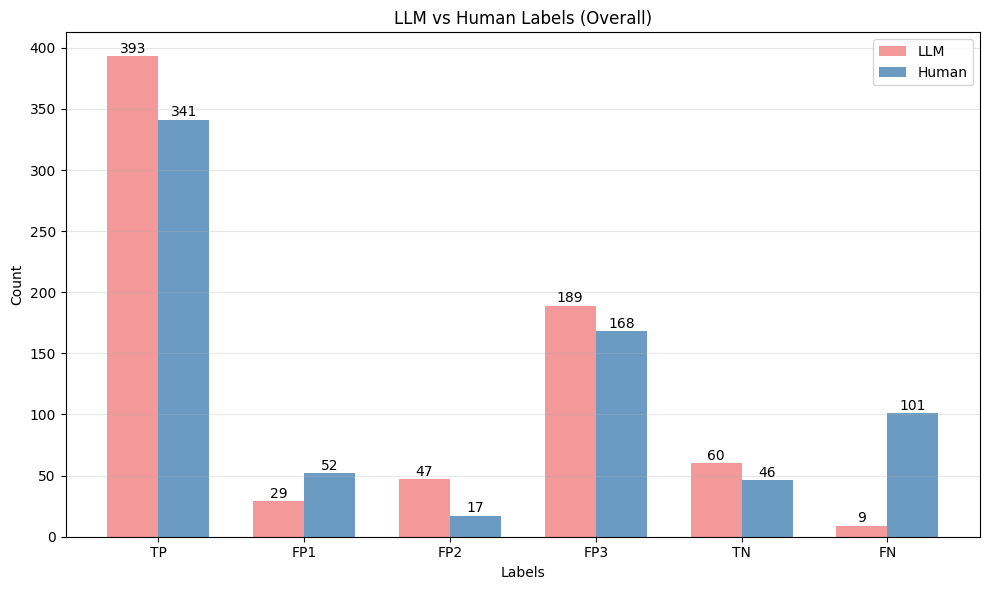

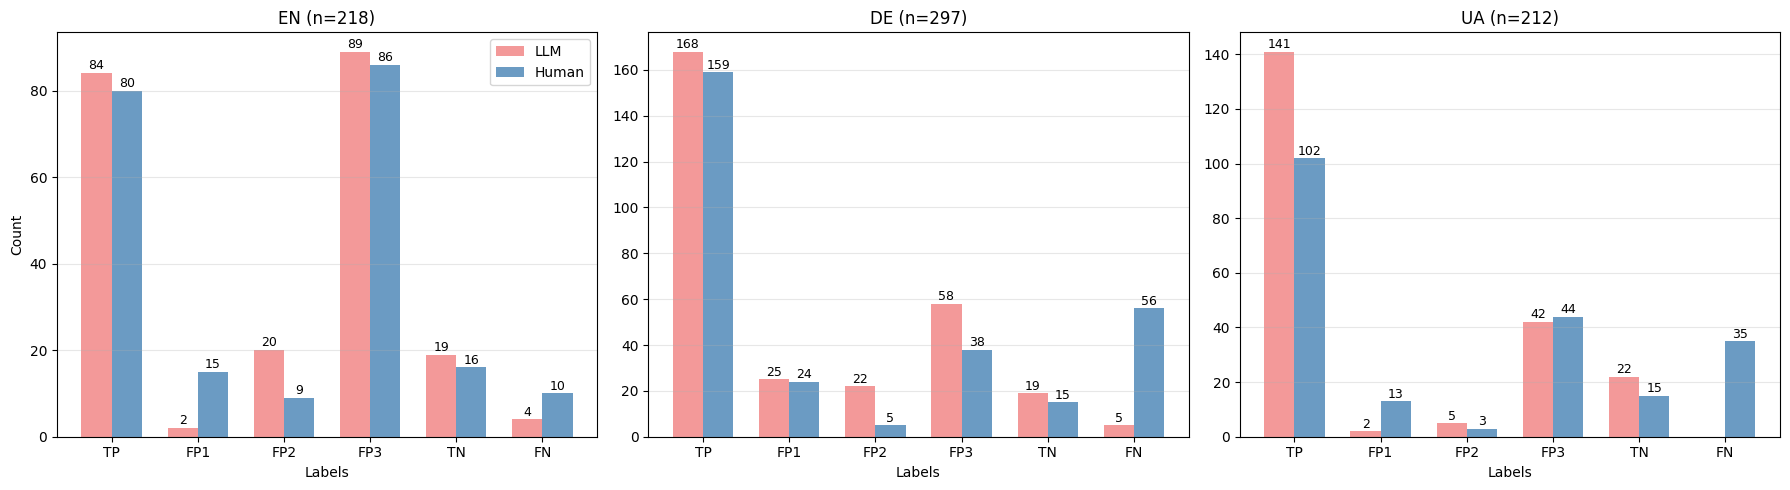

In [ ]:
# Visualizations
print('=== PLOTS ===')
plot_overall_llm_vs_human(aggregated)
plot_by_language_llm_vs_human(aggregated)

In [ ]:
# Sample Examples (New Format)
print('=== EXAMPLES ===')
examples = sample_english_aligned_examples(aggregated, n_per_label=3)
for label in STANDARD_LABELS:
    if label in examples and examples[label]:
        print(f'\\n{label}:')
        for i, example in enumerate(examples[label]):
            print(f'  {i+1}. {example}')
            if i < len(examples[label]) - 1:
                print('     ---')
    else:
        print(f'\\n{label}: No examples')

=== EXAMPLES ===
\nTP:
  1. African immigrant makes nazi salute behing the seal of the United States.[LLM: TP, Human: TP]
     ---
  2. Also since there are more Swedish speakers, there are more opportunities and resources language wise[LLM: FP2, Human: TP]
     ---
  3. And in the tape, these stops are more clearly heard than t.[LLM: TP, Human: TP]
\nFP1:
  1. 53,000 NHS staff off sick as Streeting can’t rule out patients in corridors next year Same, I work in community mental health.[LLM: TP, Human: FP1]
     ---
  2. Be sure to check individual reviews and weigh them against the factors for you.[LLM: FP2, Human: FP1]
     ---
  3. How does the language of the amendment allow this to happen?[LLM: TP, Human: FP1]
\nFP2:
  1. "GS-16 Equivalent" Job Announcement There were GS 16-18 but they were replaced by ST/SL in 1978.[LLM: FP3, Human: FP2]
     ---
  2. Didn‘t spend enough time there to really judge the restaurant tho scene[LLM: FP3, Human: FP2]
     ---
  3. Few questions before ou